In [1]:
import os
import pandas as pd
import numpy as np

In [30]:
topDir = 'Train_S700_Test_S700'
listFiles = os.listdir(topDir)

auc_varset0 = []
auc_varset1 = []
name_varset0 = []
name_varset1 = []

appended_data_varset0 = []
appended_data_varset1 = []
    
for combo in listFiles:
        if '.png' in combo:
            continue
        perfDF  = pd.read_csv(topDir+'/'+combo+'/Performance.csv')
        splitCombo = combo.split('_')
        width = splitCombo[2]
        batchsize = splitCombo[3]
        varSet = splitCombo[4]
        depth = splitCombo[5]
        perfDF['Combo'] = combo
        if varSet=='0':
            appended_data_varset0.append(perfDF)
            name_varset0 += [combo] 
            auc_varset0 += [perfDF['ROC_AUC_Weighted']]
        if varSet=='1':
            appended_data_varset1.append(perfDF)
            name_varset1 += [combo] 
            auc_varset1 += [perfDF['ROC_AUC_Weighted']]
        
appended_data_varset0 = pd.concat(appended_data_varset0, axis=0,ignore_index=True )
appended_data_varset1 = pd.concat(appended_data_varset1, axis=0,ignore_index=True )
    
print (appended_data_varset0.loc[appended_data_varset0['ROC_AUC_Weighted'].idxmax()])
print (appended_data_varset1.loc[appended_data_varset1['ROC_AUC_Weighted'].idxmax()])


evenRow = []
oddRow = []
for i in range(0,54):
        if i%2==0:
            evenRow += [i]
        else:
            oddRow += [i]

Unnamed: 0                                    0
BackgroundEfficiency                   0.294696
BackgroundRejection                     3.39333
ROC_AUC                                 0.86712
ROC_AUC_Weighted                       0.869217
SignalEfficiency                       0.868448
Combo                   llqqDNN_200_64_1024_0_2
Name: 10, dtype: object
Unnamed: 0                                     0
BackgroundEfficiency                    0.144224
BackgroundRejection                      6.93364
ROC_AUC                                   0.9555
ROC_AUC_Weighted                        0.954512
SignalEfficiency                        0.947349
Combo                   llqqDNN_200_128_2048_1_2
Name: 20, dtype: object


<Figure size 432x288 with 0 Axes>

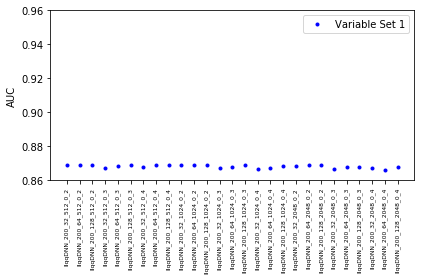

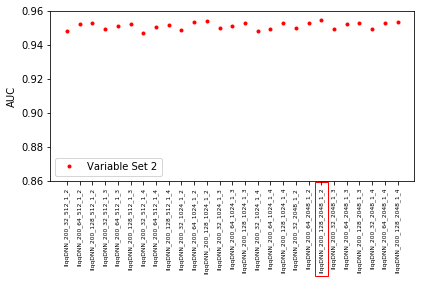

In [59]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle,Arrow

plt.clf()
fig, ax = plt.subplots()    
plt.plot(evenRow,auc_varset0,'bo', label='Variable Set 1', markersize=3)
plt.ylabel('AUC')
plt.ylim([0.860, 0.960])
plt.xticks(evenRow, name_varset0, rotation='vertical',fontsize=6)
plt.legend(loc='best')
fig.tight_layout()

bbox_args = dict(boxstyle="round", fc="1.0",alpha=0.5,edgecolor='red')
arrow_args = dict(arrowstyle="->")


# plt.savefig(topDir+"/AUC_vs_Combo_varset1.png")
plt.show()
# plt.clf()

fig, ax = plt.subplots()
plt.plot(oddRow,auc_varset1,'ro', label='Variable Set 2', markersize=3)
plt.ylabel('AUC')
plt.ylim([0.860, 0.960])
plt.xticks(oddRow, name_varset1, rotation='vertical',fontsize=6)
plt.legend(loc='best')

someX, someY = 40,0.804
ax.add_patch(Rectangle((someX, someY), 2, 0.055,clip_on=False, alpha=1.0, facecolor='None',edgecolor='r'))
fig.tight_layout()
# plt.savefig(topDir+"/AUC_vs_Combo_varset2.png")
plt.show()
# plt.clf()